# CREDIT CARD BALANCE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
credit_card_balance = pd.read_csv('credit_card_balance.csv')

## INFORMASI AWAL

In [5]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [6]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [7]:
# Memisahkan kolom numerikal dan kategorikal
kolom_numerikal = credit_card_balance.select_dtypes(include=['number']).columns
kolom_kategorikal = credit_card_balance.select_dtypes(include=['object']).columns

## EDA KOLOM NUMERIKAL

In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)

### Describe

In [9]:
credit_card_balance[kolom_numerikal].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3840312.00,1904503.59,536469.47,1000018.00,1434385.00,1897122.00,2369327.75,2843496.00
SK_ID_CURR,3840312.00,278324.21,102704.48,100006.00,189517.00,278396.00,367580.00,456250.00
MONTHS_BALANCE,3840312.00,-34.52,26.67,-96.00,-55.00,-28.00,-11.00,-1.00
AMT_BALANCE,3840312.00,58300.16,106307.03,-420250.18,0.00,0.00,89046.69,1505902.19
AMT_CREDIT_LIMIT_ACTUAL,3840312.00,153807.96,165145.70,0.00,45000.00,112500.00,180000.00,1350000.00
AMT_DRAWINGS_ATM_CURRENT,3090496.00,5961.32,28225.69,-6827.31,0.00,0.00,0.00,2115000.00
AMT_DRAWINGS_CURRENT,3840312.00,7433.39,33846.08,-6211.62,0.00,0.00,0.00,2287098.31
AMT_DRAWINGS_OTHER_CURRENT,3090496.00,288.17,8201.99,0.00,0.00,0.00,0.00,1529847.00
AMT_DRAWINGS_POS_CURRENT,3090496.00,2968.80,20796.89,0.00,0.00,0.00,0.00,2239274.16
AMT_INST_MIN_REGULARITY,3535076.00,3540.20,5600.15,0.00,0.00,0.00,6633.91,202882.01


### Boxplot

C:\Users\sanny\AppData\Local\Temp\ipykernel_9576\1371416705.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_9576\1371416705.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_9576\1371416705.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_9576\1371416705.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_9576\1371416705.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_9576\1371416705.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_9576\1371416705.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Loca

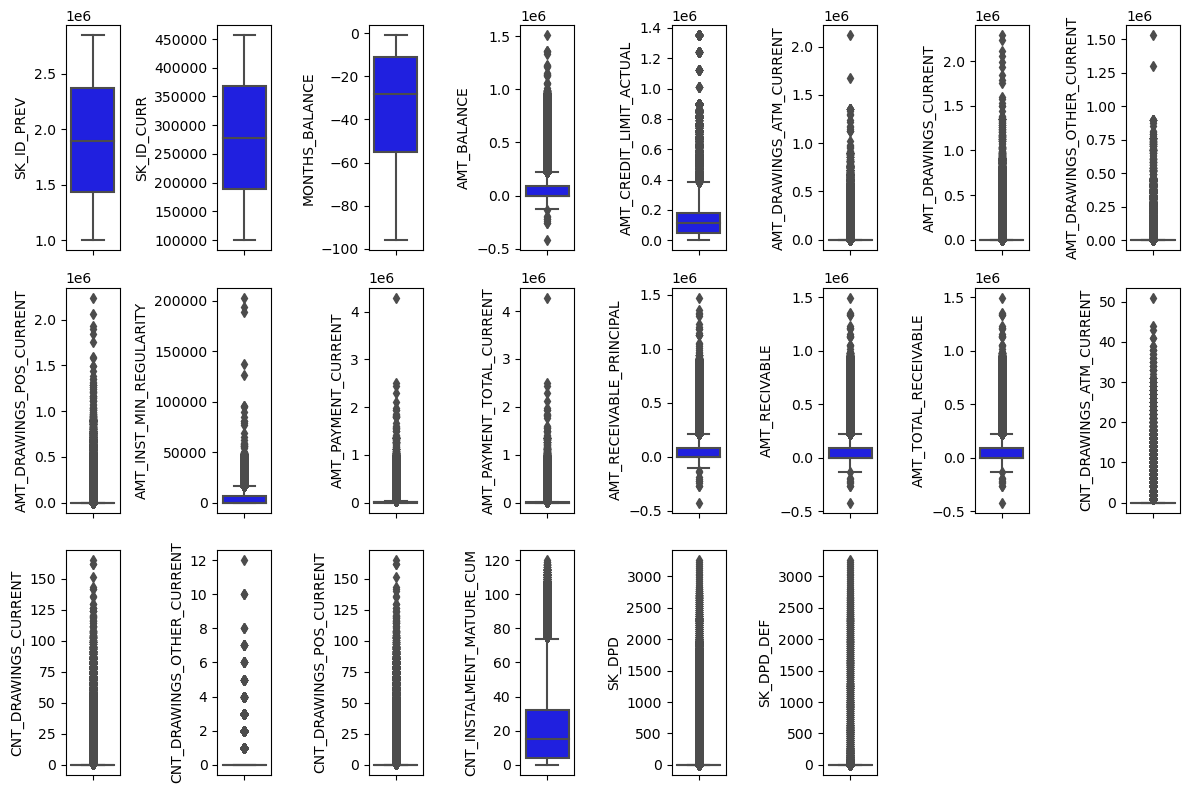

In [11]:
plt.figure(figsize=(12, 8))

for i in range(0, len(kolom_numerikal)):
    plt.subplot(3, 8, i+1)
    sns.boxplot(y=credit_card_balance[kolom_numerikal[i]], color='blue', orient='v')
    plt.tight_layout()

### Distplot

### Heatmap

<Axes: >

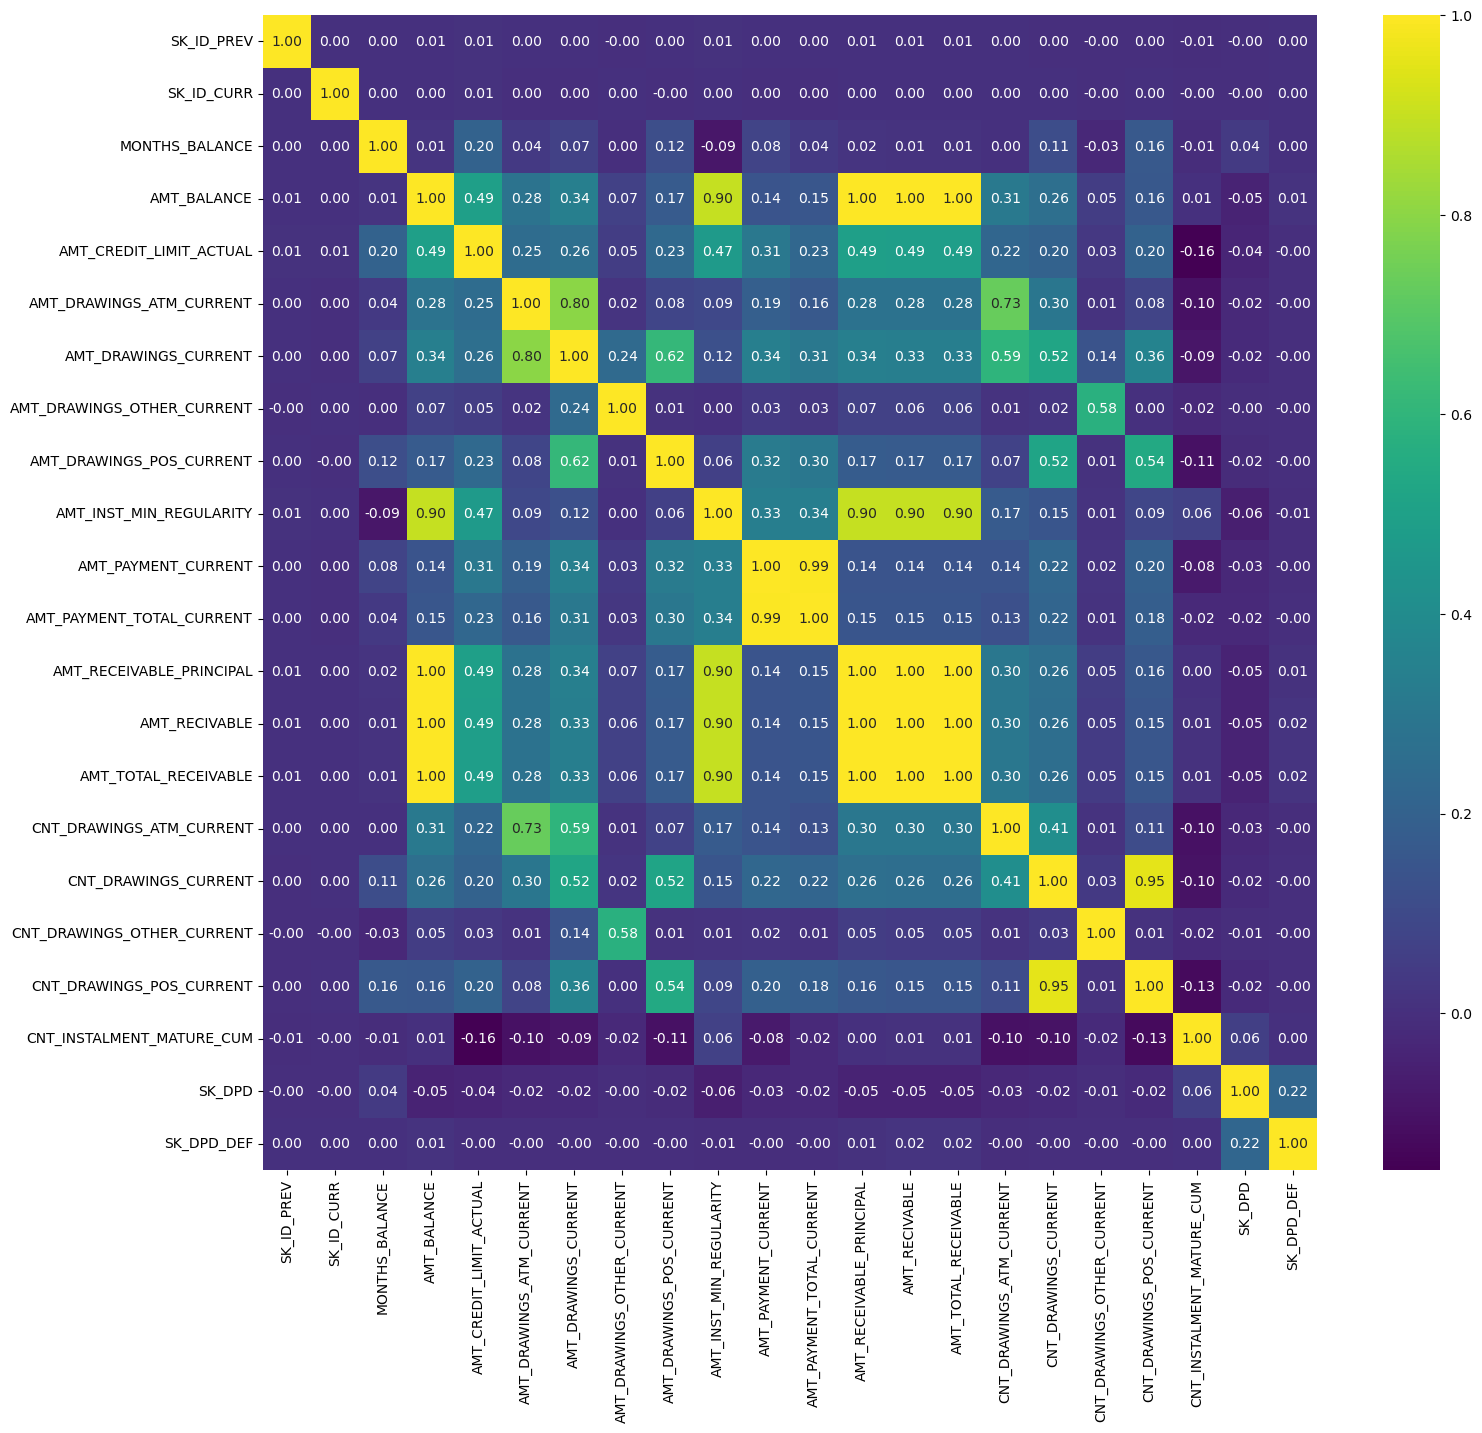

In [12]:
plt.figure(figsize=(17, 15))
sns.heatmap(credit_card_balance[kolom_numerikal].corr(), cmap='viridis', annot=True, fmt='.2f')

# DAFTAR KOLOM INI DIHAPUS KARENA REDUNDAN
kolom_dihapus = ['AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'AMT_INST_MIN_REGULARITY',
                 'AMT_PAYMENT_TOTAL_CURRENT', 'CNT_DRAWINGS_POS_CURRENT']

In [14]:
credit_card_balance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3840312.00,1904503.59,536469.47,1000018.00,1434385.00,1897122.00,2369327.75,2843496.00
SK_ID_CURR,3840312.00,278324.21,102704.48,100006.00,189517.00,278396.00,367580.00,456250.00
MONTHS_BALANCE,3840312.00,-34.52,26.67,-96.00,-55.00,-28.00,-11.00,-1.00
AMT_BALANCE,3840312.00,58300.16,106307.03,-420250.18,0.00,0.00,89046.69,1505902.19
AMT_CREDIT_LIMIT_ACTUAL,3840312.00,153807.96,165145.70,0.00,45000.00,112500.00,180000.00,1350000.00
AMT_DRAWINGS_ATM_CURRENT,3090496.00,5961.32,28225.69,-6827.31,0.00,0.00,0.00,2115000.00
AMT_DRAWINGS_CURRENT,3840312.00,7433.39,33846.08,-6211.62,0.00,0.00,0.00,2287098.31
AMT_DRAWINGS_OTHER_CURRENT,3090496.00,288.17,8201.99,0.00,0.00,0.00,0.00,1529847.00
AMT_DRAWINGS_POS_CURRENT,3090496.00,2968.80,20796.89,0.00,0.00,0.00,0.00,2239274.16
AMT_INST_MIN_REGULARITY,3535076.00,3540.20,5600.15,0.00,0.00,0.00,6633.91,202882.01


## EDA KOLOM KATEGORIKAL

### Describe

In [13]:
credit_card_balance[kolom_kategorikal].describe().transpose()

,count,unique,top,freq
NAME_CONTRACT_STATUS,3840312,7,Active,3698436


### Nilai Unik

In [15]:
for col in kolom_kategorikal:
    print(f'''Value count kolom {col}:''')
    print(credit_card_balance[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_STATUS:
NAME_CONTRACT_STATUS
Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: count, dtype: int64



### DIstribution Barchart

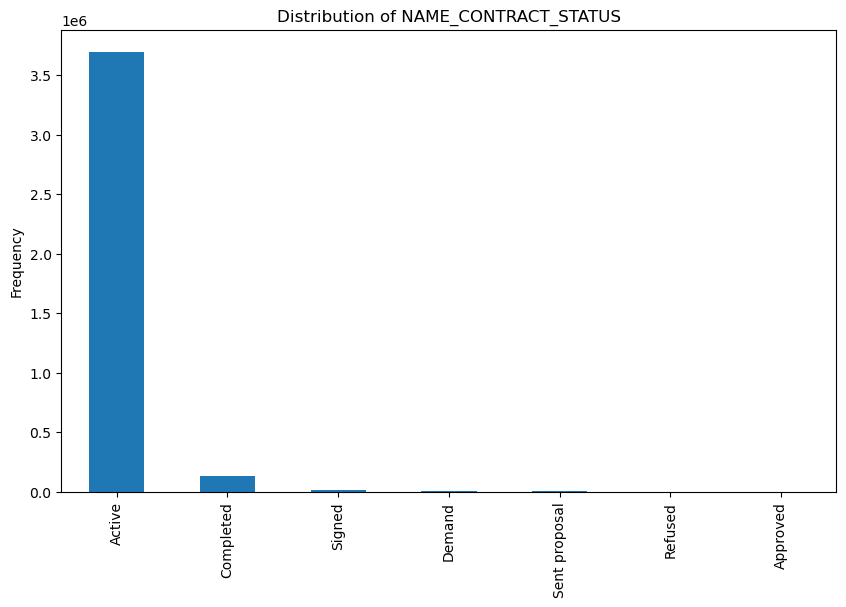

In [16]:
# Membuat bar chart untuk setiap kolom kategorikal
for i, col in enumerate(kolom_kategorikal):
    plt.figure(figsize=(10, 6))
    credit_card_balance[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("Frequency")
    plt.show()

# DATA PREPROCESSING

## DROP KOLOM REDUNDAN

In [17]:
kolom_dihapus = ['AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_TOTAL_CURRENT', 'CNT_DRAWINGS_POS_CURRENT']

credit_card_balance.drop(columns=kolom_dihapus, inplace=True)

## MISSING VALUES

### Ceck Missing Values

In [18]:
# Hitung jumlah missing values untuk setiap kolom
jumlah_missing = credit_card_balance.isnull().sum()

# Hitung persentase missing values untuk setiap kolom
persentase_missing = round((jumlah_missing / len(credit_card_balance)) * 100, 2)

# Gabungkan hasil dalam satu DataFrame
missing_summary = pd.DataFrame({
    'Jumlah Missing Values': jumlah_missing,
    'Persentase Missing Values (%)': persentase_missing
})

# Filter hanya kolom yang memiliki missing values
missing_summary_filtered = missing_summary[missing_summary['Jumlah Missing Values'] > 0]

print(missing_summary_filtered)

                            Jumlah Missing Values  \
AMT_DRAWINGS_ATM_CURRENT                   749816   
AMT_DRAWINGS_OTHER_CURRENT                 749816   
AMT_DRAWINGS_POS_CURRENT                   749816   
AMT_PAYMENT_CURRENT                        767988   
CNT_DRAWINGS_ATM_CURRENT                   749816   
CNT_DRAWINGS_OTHER_CURRENT                 749816   
CNT_INSTALMENT_MATURE_CUM                  305236   

                            Persentase Missing Values (%)  
AMT_DRAWINGS_ATM_CURRENT                            19.52  
AMT_DRAWINGS_OTHER_CURRENT                          19.52  
AMT_DRAWINGS_POS_CURRENT                            19.52  
AMT_PAYMENT_CURRENT                                 20.00  
CNT_DRAWINGS_ATM_CURRENT                            19.52  
CNT_DRAWINGS_OTHER_CURRENT                          19.52  
CNT_INSTALMENT_MATURE_CUM                            7.95  


### Penanganan Missing Values

In [20]:
# Mengganti nilai NaN dengan median
credit_card_balance[['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_INSTALMENT_MATURE_CUM']] = credit_card_balance[['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_INSTALMENT_MATURE_CUM']].apply(lambda x: x.fillna(x.median()))

### Ceck Missing Values Kembali

In [21]:
credit_card_balance.isna().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
MONTHS_BALANCE                0
AMT_BALANCE                   0
AMT_CREDIT_LIMIT_ACTUAL       0
AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_CURRENT          0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
AMT_PAYMENT_CURRENT           0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_CURRENT          0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_INSTALMENT_MATURE_CUM     0
NAME_CONTRACT_STATUS          0
SK_DPD                        0
SK_DPD_DEF                    0
dtype: int64

## OUTLIERS

In [22]:
credit_card_balance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3840312.00,1904503.59,536469.47,1000018.00,1434385.00,1897122.00,2369327.75,2843496.00
SK_ID_CURR,3840312.00,278324.21,102704.48,100006.00,189517.00,278396.00,367580.00,456250.00
MONTHS_BALANCE,3840312.00,-34.52,26.67,-96.00,-55.00,-28.00,-11.00,-1.00
AMT_BALANCE,3840312.00,58300.16,106307.03,-420250.18,0.00,0.00,89046.69,1505902.19
AMT_CREDIT_LIMIT_ACTUAL,3840312.00,153807.96,165145.70,0.00,45000.00,112500.00,180000.00,1350000.00
AMT_DRAWINGS_ATM_CURRENT,3840312.00,4797.38,25430.70,-6827.31,0.00,0.00,0.00,2115000.00
AMT_DRAWINGS_CURRENT,3840312.00,7433.39,33846.08,-6211.62,0.00,0.00,0.00,2287098.31
AMT_DRAWINGS_OTHER_CURRENT,3840312.00,231.90,7358.72,0.00,0.00,0.00,0.00,1529847.00
AMT_DRAWINGS_POS_CURRENT,3840312.00,2389.15,18693.53,0.00,0.00,0.00,0.00,2239274.16
AMT_PAYMENT_CURRENT,3840312.00,8765.12,32411.65,0.00,247.95,2702.70,7875.00,4289207.45


### Menggeser Nilai pada Kolom yang memiliki Nilai Negatif

In [23]:
# Mencari nilai minimum pada kolom
min_value = credit_card_balance['MONTHS_BALANCE'].min()
min_value2 = credit_card_balance['AMT_BALANCE'].min()
min_value3 = credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].min()
min_value4 = credit_card_balance['AMT_DRAWINGS_CURRENT'].min()


# Jika ada nilai negatif, tambahkan nilai positif untuk menggeser semua nilai menjadi positif
if min_value < 0:
    credit_card_balance['MONTHS_BALANCE'] = credit_card_balance['MONTHS_BALANCE'] + abs(min_value)

if min_value2 < 0:
    credit_card_balance['AMT_BALANCE'] = credit_card_balance['AMT_BALANCE'] + abs(min_value2)
    
if min_value3 < 0:
    credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'] = credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'] + abs(min_value3)
    
if min_value4 < 0:
    credit_card_balance['AMT_DRAWINGS_CURRENT'] = credit_card_balance['AMT_DRAWINGS_CURRENT'] + abs(min_value4)

### Ceck Hasil Penggeseran

In [25]:
credit_card_balance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3840312.00,1904503.59,536469.47,1000018.00,1434385.00,1897122.00,2369327.75,2843496.00
SK_ID_CURR,3840312.00,278324.21,102704.48,100006.00,189517.00,278396.00,367580.00,456250.00
MONTHS_BALANCE,3840312.00,61.48,26.67,0.00,41.00,68.00,85.00,95.00
AMT_BALANCE,3840312.00,478550.34,106307.03,0.00,420250.18,420250.18,509296.87,1926152.37
AMT_CREDIT_LIMIT_ACTUAL,3840312.00,153807.96,165145.70,0.00,45000.00,112500.00,180000.00,1350000.00
AMT_DRAWINGS_ATM_CURRENT,3840312.00,11624.69,25430.70,0.00,6827.31,6827.31,6827.31,2121827.31
AMT_DRAWINGS_CURRENT,3840312.00,13645.01,33846.08,0.00,6211.62,6211.62,6211.62,2293309.94
AMT_DRAWINGS_OTHER_CURRENT,3840312.00,231.90,7358.72,0.00,0.00,0.00,0.00,1529847.00
AMT_DRAWINGS_POS_CURRENT,3840312.00,2389.15,18693.53,0.00,0.00,0.00,0.00,2239274.16
AMT_PAYMENT_CURRENT,3840312.00,8765.12,32411.65,0.00,247.95,2702.70,7875.00,4289207.45


### Log Transformation

In [26]:
# Kolom ini dihapus karena tidak akan digunakan kembali
credit_card_balance = credit_card_balance.drop(columns=['SK_ID_PREV'])

In [27]:
# 1. Identifikasi kolom yang tidak akan di-transformasi
# SK_ID_CURR tidak diubah, dan kolom boolean juga tidak diubah
exclude_columns = ['SK_ID_CURR'] + list(credit_card_balance.select_dtypes(include=['bool']).columns)

# 2. Identifikasi kolom numerik yang akan di-transformasi (kecuali yang ada di exclude_columns)
numeric_columns = credit_card_balance.select_dtypes(include=[np.number]).columns
columns_to_transform = [col for col in numeric_columns if col not in exclude_columns]

# 3. Terapkan log transformation pada kolom-kolom yang sudah diidentifikasi
# Tambahkan 1 untuk menghindari log(0)
credit_card_balance[columns_to_transform] = credit_card_balance[columns_to_transform].apply(lambda x: np.log1p(x))

## ENCODING

In [30]:
# Frequency Encoding
# Hitung frekuensi kemunculan untuk setiap kategori di kolom CREDIT_ACTIVE
freq_encoding = credit_card_balance['NAME_CONTRACT_STATUS'].value_counts()

# Map frekuensi tersebut ke dalam kolom baru
credit_card_balance['NAME_CONTRACT_STATUS_ENCODE'] = credit_card_balance['NAME_CONTRACT_STATUS'].map(freq_encoding)

In [33]:
credit_card_balance = credit_card_balance.drop(columns=['NAME_CONTRACT_STATUS'])

In [34]:
credit_card_balance.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_ENCODE
0,378907,4.51,12.95,11.81,8.83,8.87,0.00,6.78,7.50,0.00,0.69,0.00,3.58,0.00,0.00,3698436
1,363914,4.56,13.09,10.71,9.11,9.04,0.00,0.00,7.72,0.69,0.69,0.00,4.25,0.00,0.00,3698436
2,371185,4.50,13.02,13.02,8.83,8.73,0.00,0.00,7.72,0.00,0.00,0.00,3.43,0.00,0.00,3698436
3,337855,4.53,13.40,12.32,9.11,9.04,0.00,0.00,9.39,0.69,0.69,0.00,2.40,0.00,0.00,3698436
4,126868,4.56,13.68,13.02,8.83,9.78,0.00,9.35,10.20,0.00,0.69,0.00,4.62,0.00,0.00,3698436


## AGGREGASI

In [35]:
# Pertama, kelompokkan berdasarkan SK_ID_CURR dan hitung rata-rata untuk kolom lainnya
agg_df = credit_card_balance.groupby('SK_ID_CURR').mean().reset_index()

# Selanjutnya, hitung berapa kali setiap SK_ID_CURR muncul dan tambahkan sebagai kolom baru
agg_df['FREQ_POSH_CASH'] = credit_card_balance.groupby('SK_ID_CURR').size().values

In [36]:
credit_card_balance = agg_df

In [37]:
credit_card_balance.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_ENCODE,FREQ_POSH_CASH
0,100006,4.54,12.95,12.51,8.83,8.73,0.00,0.00,7.90,0.00,0.00,0.00,0.00,0.00,0.00,3698436.00,6
1,100011,3.99,13.06,11.98,8.87,8.78,0.00,0.00,7.48,0.02,0.02,0.00,3.14,0.00,0.00,3698436.00,74
2,100013,3.60,12.99,11.68,8.97,8.88,0.00,0.00,6.07,0.08,0.08,0.00,2.89,0.01,0.01,3698436.00,96
3,100021,4.46,12.95,13.42,8.83,8.73,0.00,0.00,7.90,0.00,0.00,0.00,0.00,0.00,0.00,1598719.53,17
4,100023,4.49,12.95,11.52,8.83,8.73,0.00,0.00,7.90,0.00,0.00,0.00,0.00,0.00,0.00,3698436.00,8


## SCALING

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Identifikasi kolom yang bertipe boolean
boolean_columns = credit_card_balance.select_dtypes(include=['bool']).columns

# Tambahkan kolom SK_ID_CURR ke daftar kolom yang akan dikecualikan
exclude_columns = ['SK_ID_CURR'] + list(boolean_columns)

# Pilih kolom yang bukan boolean dan bukan SK_ID_CURR
scaling_columns = credit_card_balance.columns.difference(exclude_columns)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling hanya pada kolom yang dipilih
credit_card_balance[scaling_columns] = scaler.fit_transform(credit_card_balance[scaling_columns])

In [39]:
credit_card_balance.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_ENCODE,FREQ_POSH_CASH
0,100006,0.97,0.18,0.89,0.00,0.00,0.00,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.03
1,100011,0.44,0.26,0.85,0.01,0.01,0.00,0.00,0.53,0.01,0.00,0.00,0.74,0.00,0.00,1.00,0.38
2,100013,0.06,0.21,0.83,0.03,0.03,0.00,0.00,0.43,0.02,0.02,0.00,0.68,0.00,0.00,1.00,0.50
3,100021,0.90,0.18,0.95,0.00,0.00,0.00,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.08
4,100023,0.93,0.18,0.82,0.00,0.00,0.00,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.04


# SIMPAN DATASET KE CSV

In [40]:
# Simpan DataFrame ke file CSV
credit_card_balance.to_csv('code_credit_card_balance.csv', index=False)